# 資産レポート

In [1]:
import sys
sys.path.append('../')
%cd '..'

/home/tsu-nera/repo/bakuchi


In [2]:
import src.utils.asset as tool

%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import japanize_matplotlib

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

In [5]:
cc_df = tool.read_asset("coincheck")
lq_df = tool.read_asset("liquid")
total_df = tool.read_asset_total()

In [6]:
len(cc_df), len(lq_df), len(total_df)

(767, 767, 1149)

In [7]:
# cc_df.head(3)

In [8]:
total_df["datetime"] = total_df.index
total_df["year"] = total_df.index.year
total_df["date"] = total_df.index.strftime('%Y-%m-%d')
total_df["year_and_month"] = total_df.index.strftime('%Y-%m')
total_df["year_and_wom"] = total_df.index.strftime('%Y-W%W')

## 日次レポート

In [9]:
df_day = total_df.tail(24)
df_day.drop(["datetime", "date", "year_and_month", "year_and_wom", "year"], axis=1).tail(12)

,jpy,btc,btc_as_jpy,total_jpy
timestamp,,,,
2020-05-06 14:00:03,10775,0.022266,21352,32127
2020-05-06 14:28:28,13845,0.024268,23341,37186
2020-05-06 15:00:02,13845,0.024268,23304,37149
2020-05-06 16:00:02,13845,0.024268,23345,37190
2020-05-06 17:00:02,13823,0.024282,23338,37161
2020-05-06 18:00:02,13823,0.024282,23398,37221
2020-05-06 19:00:02,13823,0.024282,23490,37313
2020-05-06 20:00:03,13823,0.024282,23835,37658
2020-05-06 21:00:02,13823,0.024282,24034,37857


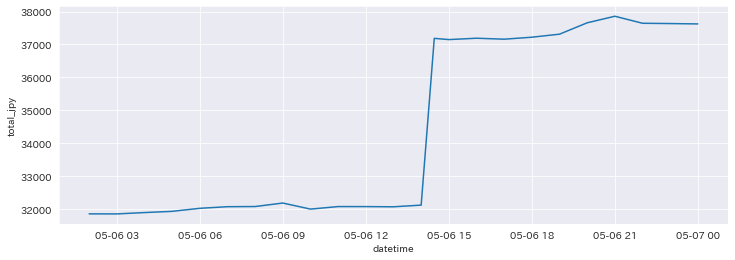

In [10]:
sns.lineplot(data=df_day, x='datetime', y="total_jpy")

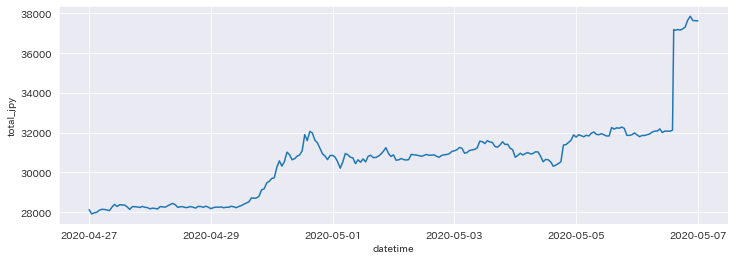

In [11]:
df_recent = total_df.tail(24*10)
sns.lineplot(data=df_recent, x='datetime', y="total_jpy")

In [12]:
groupby = df_recent.groupby("date")
df_days = pd.DataFrame()
df_days["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [13]:
df_days.tail(10)

,total_jpy
date,
2020-04-28,28270.833
2020-04-29,28542.667
2020-04-30,30918.826
2020-05-01,30752.625
2020-05-02,30820.522
2020-05-03,31300.833
2020-05-04,30918.250
2020-05-05,31974.875
2020-05-06,34161.080


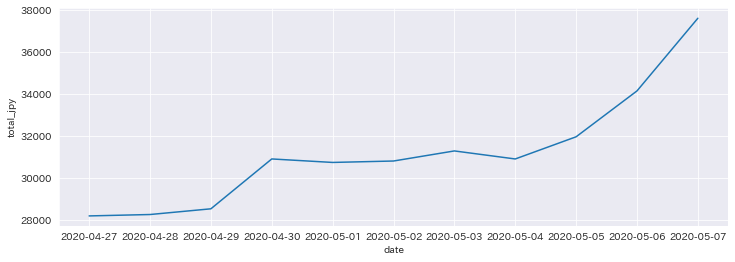

In [14]:
df_days["date"] = df_days.index
sns.lineplot(data=df_days, x='date', y='total_jpy')

## 週次レポート

In [15]:
groupby = total_df.groupby('year_and_wom')
df_by_week = pd.DataFrame()
df_by_week["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [16]:
df_by_week

,total_jpy
year_and_wom,
2020-W11,25017.029
2020-W12,26063.988
2020-W13,25859.488
2020-W14,27124.141
2020-W15,26644.312
2020-W16,27206.778
2020-W17,29817.542
2020-W18,32447.108


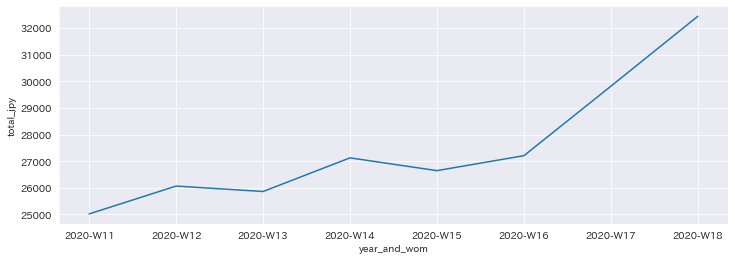

In [17]:
df_by_week["year_and_wom"] = df_by_week.index
sns.lineplot(data=df_by_week, x='year_and_wom', y='total_jpy')

## 月次レポート

In [18]:
groupby = total_df.groupby('year_and_month')
df_by_month = pd.DataFrame()
df_by_month["total_jpy"] = round(groupby["total_jpy"].mean(), 3)

In [19]:
df_by_month

,total_jpy
year_and_month,
2020-03,25610.426
2020-04,27119.185
2020-05,31718.903


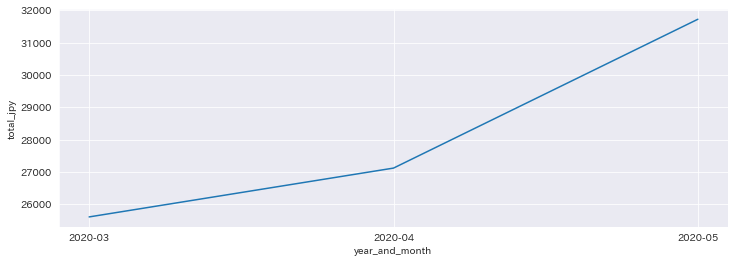

In [20]:
df_by_month["year_and_month"] = df_by_month.index
sns.lineplot(data=df_by_month, x='year_and_month', y='total_jpy')